In [1]:
import os
import cv2
import numpy as np
import smtplib as sm
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img = image.load_img("D:\\Project\\training and classification\\Training\\Empty\\Tran_empty  (4).png")

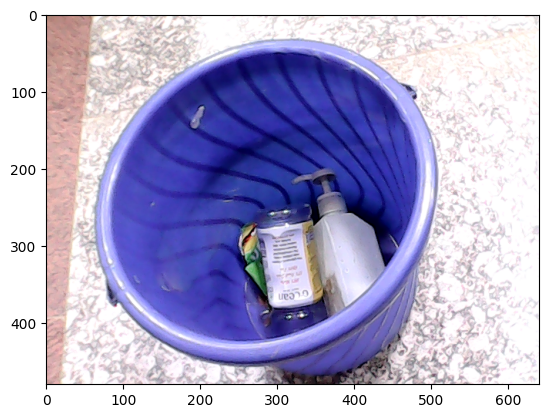

In [5]:
plt.imshow(img)

In [6]:
training= ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [11]:
training_dataset = training.flow_from_directory('D:\\Project\\training and classification\\Training',
                                         target_size = (200,200),
                                         batch_size=3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('D:\\Project\\training and classification\\Validation',
                                                   target_size = (200,200),
                                                   batch_size =3,
                                                   class_mode = 'binary')

Found 516 images belonging to 2 classes.
Found 127 images belonging to 2 classes.


In [12]:
training_dataset.class_indices

{'Empty': 0, 'Full': 1}

In [13]:
 train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation ='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # layer2
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # layers3
                                    tf.keras.layers.Conv2D(128,(3,3),activation ='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #layer4
                                    tf.keras.layers.Conv2D(256,(3,3),activation ='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #Flatten
                                    tf.keras.layers.Flatten(),
                                    # Dense layer
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')                               
    
])

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [29]:
Trained_history=model.fit(train_dataset,
                    steps_per_epoch =2,
                    epochs= 25,
                    validation_data= validation_dataset)

Epoch 1/25
2/2 [==============================] - 4s 4s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.9449
Epoch 2/25
2/2 [==============================] - 3s 3s/step - loss: 0.4367 - accuracy: 0.8333 - val_loss: 0.3556 - val_accuracy: 0.9370
Epoch 3/25
2/2 [==============================] - 3s 3s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.9291
Epoch 4/25
2/2 [==============================] - 3s 3s/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 0.4243 - val_accuracy: 0.9213
Epoch 5/25
2/2 [==============================] - 3s 3s/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.3957 - val_accuracy: 0.9055
Epoch 6/25
2/2 [==============================] - 3s 3s/step - loss: 0.0911 - accuracy: 1.0000 - val_loss: 0.1714 - val_accuracy: 0.9685
Epoch 7/25
2/2 [==============================] - 4s 3s/step - loss: 0.5623 - accuracy: 0.8333 - val_loss: 0.2879 - val_accuracy: 0.9213
Epoch 8/25
2/2 [=========================

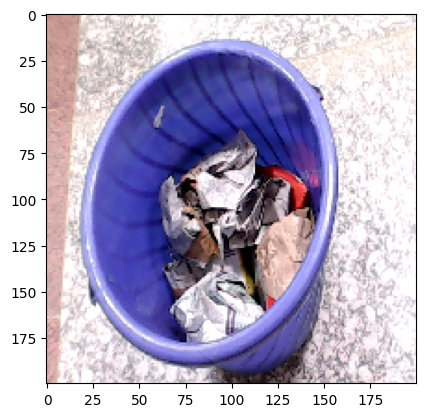

1/1 [==============================] - 1s 508ms/step
Dustbin is Empty


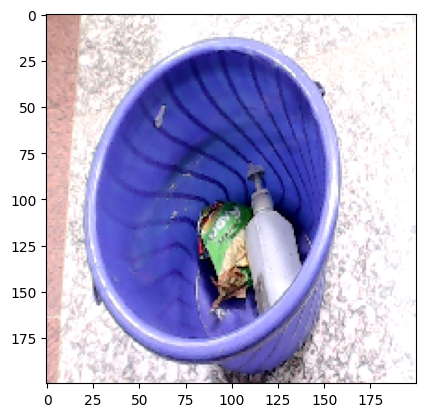

1/1 [==============================] - 0s 41ms/step
Dustbin is Empty


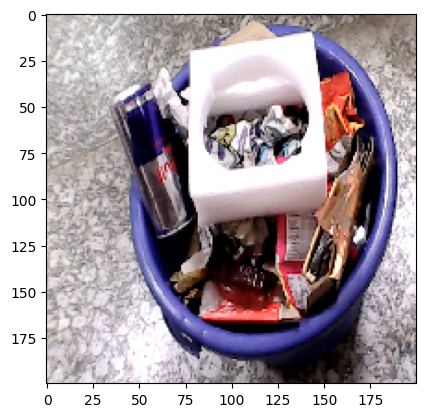

1/1 [==============================] - 0s 59ms/step
Dustbin is full, Please Empty me


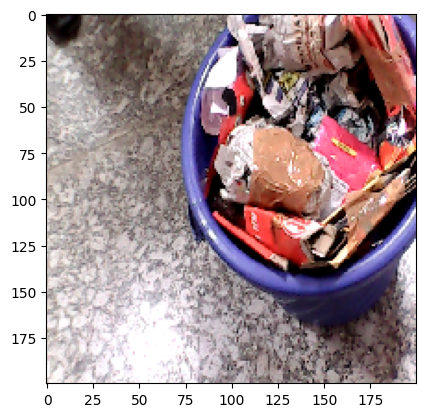

1/1 [==============================] - 0s 63ms/step
Dustbin is full, Please Empty me


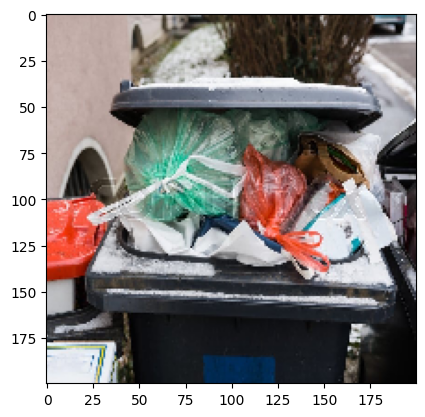

1/1 [==============================] - 0s 54ms/step
Dustbin is full, Please Empty me


In [17]:
dir_path ='D:\\Project\\training and classification\\Testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val=model.predict(images)
    if val==0:
        print('Dustbin is Empty')
    else:
        print('Dustbin is full, Please Empty me')
        email_sender='ashishkr119191@gmail.com'
        email_password='rzjizrjicdgczjlp'
        email_receiver='nainamogha20star@gmail.com'
        ob=sm.SMTP('smtp.gmail.com',587)
        ob.ehlo()
        ob.starttls()
        ob.login('ashishkr119191@gmail.com','rzjizrjicdgczjlp')
        subject="Muncipal Management"
        body="The dustbin of Moti bagh is almost FULL, Please send  team to vacant me ,You may CLICK  here to get the route ."
        message="subject:{}\n\n{}".format(subject,body)
        ob.sendmail('nainamogha20star@gmail.com','muskan0811win@gmail.com',message)
        ob.quit()

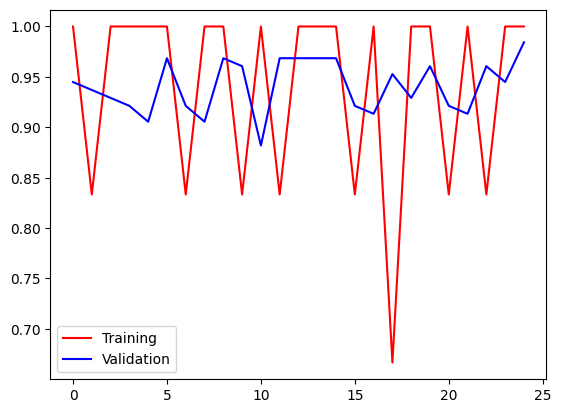

In [30]:
plt.plot(Trained_history.history['accuracy'],color='red',label='Training')
plt.plot(Trained_history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show()

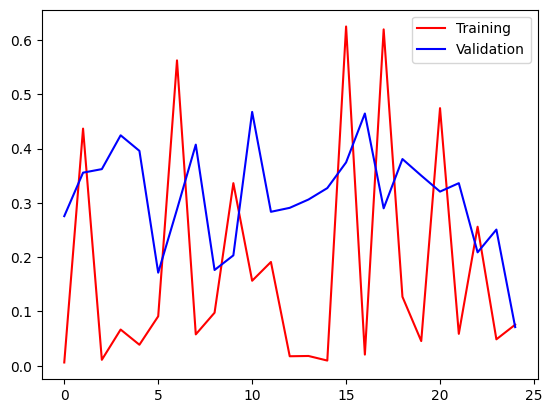

In [31]:
plt.plot(Trained_history.history['loss'],color='red',label='Training')
plt.plot(Trained_history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.show()